In [1]:
import numpy as np
import numpy.random as nrd
import random as rd 
import matplotlib.pyplot as plt
from math import *

In [2]:
def pricing_call(Nmc, T, K, S0, r ,sigma):
  gain = 0
  for i in range(0,Nmc):
    ST = S0*exp((r-sigma**2/2)*T + sigma*sqrt(T)*nrd.randn())
    gain = gain + max(ST-K, 0)
  prix = exp(-r*T)*gain/Nmc
  return(prix)


pricing_call(100000, 0.5, 10, 10, 0.1,0.5)

1.62533123017365

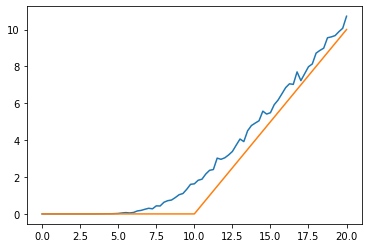

In [3]:
def graph_prix_call(Nmc, T, K, r ,sigma):
  S0 = []
  Max = []
  prix_option = []
  for j in range(0,81):
    S0.append(0.25*j)
    Max.append(max(S0[j]-K,0))
    prix_option.append(pricing_call(Nmc, T, K, S0[j], r ,sigma))
  plt.plot(S0, prix_option)
  plt.plot(S0, Max)
    
graph_prix_call(1000, 0.5, 10, 0.1,0.5)

In [4]:
def Prix_CallEu_St_fixe(t,St, r, sigma, Nmc, K, T):
  gain = 0
  for i in range(0, Nmc):
    ST = St*exp((r-sigma**2/2)*(T-t) + sigma*sqrt(T-t)*nrd.randn())
    gain = gain + max(ST-K,0)
  prix = exp(-r*(T-t))*gain/Nmc
  return prix

Prix_CallEu_St_fixe(0.1, 20,0.1,0.5,1000,10,0.5)

10.552987097757148

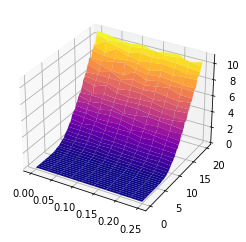

In [6]:
def Surfac_CallEu(r, sigma, Nmc, K, T):
  St = np.linspace(0,20,80)
  prix  = np.zeros((10,80))
  t = np.linspace(0,T/2,10)
  Y, X = np.meshgrid(St, t)
  for j in range(0,80):
    for n in range(0,10):
      prix[n][j] = Prix_CallEu_St_fixe(t[n],St[j],r, sigma, Nmc, K, T)
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, prix, cmap='plasma')

Surfac_CallEu(0.1,0.5,1000,10,0.5)

In [ ]:
def simulactif(N, T, S0, r ,sigma):
  S = np.zeros(N)
  S[0] = S0
  t = np.linspace(0,T,N)
  deltaT = T/N
  for n in range(0,N-1):
     S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
  plt.figure()
  plt.plot(t,S)
  plt.title("evolution de l'actif ")
  #return S

simulactif(100, 1, 10, 0.4 ,0.3)

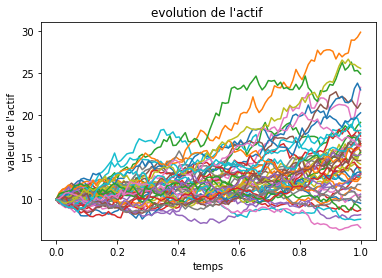

0

In [13]:
def simulactif(Nmc,N, T, S0, r ,sigma):
  S = [S0]
  t = np.linspace(0,T,N)
  deltaT = T/N
  for k in range(0,Nmc):
       S = [S0]
       for n in range(1,N):
              S.append(S[n-1]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn()))
       plt.plot(t,S)
  plt.title("evolution de l'actif ")
  plt.xlabel("temps")
  plt.ylabel("valeur de l'actif")
  plt.show()
  return 0

simulactif(50,100, 1, 10, 0.4 ,0.3)

# quelques stratégies de couverture HUll JC chapter19 Greek Letters


***Context****
une institution financiere qui vend pour 300000$  des call eu sur 100000 actions ne payant pas de dividendes.
le prix de l'action est de 49$ , le strike K = 50$ , le taix sans risque  r = 5percent , sigma =20 per cent , le temps a la maturité est 20 semaines soit 0.3846 ans . 
the expecting return from de stock is 13 per cent  per anum : mu = 0.13

bS price for option is 240000 ( soit 2.40 par option )

l'institution a donc vendu un produit 60000$ plus cher que le prix theéorique . Le probleme du hedging intervient :


In [16]:
#prix du call par MC
pricing_call(100000, T=0.3846, K=50, S0 =49, r = 0.05 ,sigma = 0.2)

2.3917336401641873

52.746390861465414

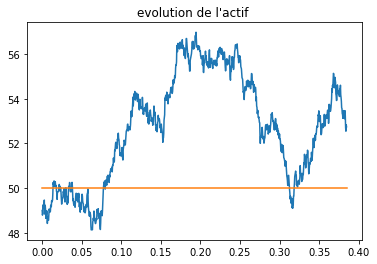

In [22]:
#analyse d'une naked postion
def simulactif(N, T,K, S0, r ,sigma):
  S = np.zeros(N)
  KK = np.array([K for i in range(N)])
  S[0] = S0
  t = np.linspace(0,T,N)
  deltaT = T/N
  for n in range(0,N-1):
     S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
  plt.figure()
  plt.plot(t,S)
  plt.plot(t,KK)
  plt.title("evolution de l'actif ")
  return S[N-1]

simulactif(1000, 0.3846, 50 , 49 , 0.05,0.2)

In [29]:
# S(T) = 52,74639 > K , l'institution doit fournir les 100000 actions aux clients qui exercent sont options.
# ils achettent les 100000 actions à 50 tandis que le pris du marché est 52.74666

perte = 100000*(52.74639-50)
perte 

274638.9999999998

In [28]:
Bilan_pl = 300000+5000000-5274639

Bilan_pl


25361

In [62]:
def nakedposition(N, T,K, S0, r ,sigma):
  S = np.zeros(N)
  KK = np.array([K for i in range(N)])
  S[0] = S0
  t = np.linspace(0,T,N)
  deltaT = T/N
  for n in range(0,N-1):
     S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
  if S[N-1]>K:
    bilan = 300000 + 100000*(-S[N-1]+50)
  else:
    bilan = 300000
  return bilan

nakedposition(1000, 0.3846, 50 , 49 , 0.05,0.2)

210462.29881471206

In [66]:
def moynakedposition(N, T,K, S0, r ,sigma):
    moy=0
    for k in range(100000):
        S = np.zeros(N)
        KK = np.array([K for i in range(N)])
        S[0] = S0
        t = np.linspace(0,T,N)
        deltaT = T/N
        for n in range(0,N-1):
             S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
        if S[N-1]>K:
            bilan = 300000 + 100000*(-S[N-1]+50)
        else:
            bilan = 300000
        moy += bilan
    return moy/100000

y = moynakedposition(1000, 0.3846, 50 , 49 , 0.05,0.2)
print("la naked position strategy genere en moyenne un pl de :" , y)
  
        

la naked position strategy genere en moyenne un pl de : 54846.00093048341


****STOP AND LOSS STRATEGY*****

Prix final de l'actif : 63.98596214761571
Moments des événements de stop-loss/take-profit : [0.0146148, 0.0449982, 0.0457674, 0.049998, 0.05038260000000001, 0.050767200000000005, 0.0684588, 0.08384280000000001, 0.0853812, 0.0857658, 0.08845800000000001, 0.08884260000000001, 0.0892272, 0.09768840000000001, 0.128841, 0.1292256, 0.1319178]
Profit ou perte totale : -52.057144526588914


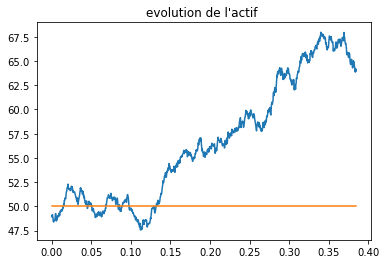

In [37]:
def stopandlossstrategy(N, T,K, S0, r ,sigma):
  S = np.zeros(N)
  KK = np.array([K for i in range(N)])
  S[0] = S0
  t = np.linspace(0,T,N)
  deltaT = T/N
  pl = 0
  timetobs= []
  for n in range(0,N-1):
     S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
     if S[n]<= K and S[n+1]> K:
            pl = pl - S[n+1]
            timetobs.append((n+1)*deltaT)
     elif S[n+1] <= K and S[n]>K :
         pl = pl + S[n+1]
         timetobs.append((n+1)*deltaT)
  plt.figure()
  plt.plot(t,S)
  plt.plot(t,KK)
  plt.title("evolution de l'actif ")
  return S[N-1] , timetobs , pl
    
prix_actif_final, moments_stop_loss_gain, profit_ou_perte = stopandlossstrategy(1000, 0.3846, 50, 49, 0.05, 0.2)    
print("Prix final de l'actif :", prix_actif_final)
print("Moments des événements de stop-loss/take-profit :", moments_stop_loss_gain)
print("Profit ou perte totale :", profit_ou_perte)

In [65]:
def Moystopandlossstrategy(N, T,K, S0, r ,sigma):
  moy= 0
  for k in range(100000):      
      S = np.zeros(N)
      KK = np.array([K for i in range(N)])
      S[0] = S0
      t = np.linspace(0,T,N)
      deltaT = T/N
      pl = 0
      for n in range(0,N-1):
         S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
         if S[n]<= K and S[n+1]> K:
                pl = pl - S[n+1]
         elif S[n+1] <= K and S[n]>K :
             pl = pl + S[n+1]
      moy += pl
  return moy/100000


x = Moystopandlossstrategy(1000, 0.3846, 50, 49, 0.05, 0.2)
z =100000*x
print("la strategie stop loss take profit genere un moyenne un pl :", z)

la strategie stop loss take profit genere un moyenne un pl : -2556943.9807015895


**** Delta Hedging****

In [71]:
#delta call eu

def deltacalleu(N, T,K, S0, r ,sigma,h,Nmc):
    deltatmp = 0
    deltaT = T/N
    for k in range(Nmc):
        Splus= S0+h
        Smoins = S0-h
        for i in range (0,N):
            fact=exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
            Splus*= fact
            Smoins*= fact
        phiplus = max(Splus-K,0)
        phimoins = max(Smoins-K,0)
        phires = (phiplus - phimoins)/(2*h)
        deltatmp+= phires
    delta = exp(-r*T)*deltatmp/Nmc   
    return delta


In [72]:
deltacalleu(1000, 0.3846, 50, 49, 0.05, 0.2,0.1,100000)

0.5233769140028689

In [76]:
from scipy.stats import norm

def calculate_delta(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

calculate_delta(49, 50, 0.05, 0.2, 0.3846)

/home/cytech/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.5216016339715761

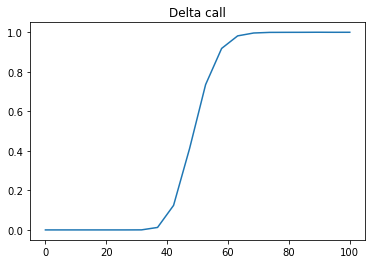

In [75]:
def graphDeltacalleu(N, T,K, S0max, r ,sigma,h,Nmc, nbS):
    S = np.linspace(0,S0max,nbS)
    deltavalue = []
    for i in range(0,nbS):
        deltavalue.append(deltacalleu(N, T,K, S[i], r ,sigma,h,Nmc))
    plt.figure()
    plt.plot(S,deltavalue )
    plt.title("Delta call")
    
graphDeltacalleu(1000, 0.3846, 50, 100, 0.05, 0.2,0.1,100000,20)

In [137]:
 def deltahedging(N, T, K, S0, r, sigma):
    deltaT = T / N
    S = np.zeros(N)  
    S[0]= S0
    t = np.linspace(0,T,N)
    delta = np.zeros(N)
    #delta[0]= deltacalleu( T,K, S0, r ,sigma,0.1,Nmc)
    delta[0] = calculate_delta(S0, K, r, sigma, T)
    pnl = calculate_delta(S0, K, r, sigma, T)*100000*S0
    for n in range(0,N-1):
            S[n+1]= S[n]*exp((r-sigma**2/2)*deltaT + sigma*sqrt(deltaT)*nrd.randn())
            Tremaining = T-n*deltaT
            delta[n+1]= calculate_delta(S[n+1], K, r, sigma, Tremaining)
    for n in range(0,N-1):
        pnl+= 100000*(delta[n+1]-delta[n])*S[n+1]
    return pnl
            
        

In [138]:
deltahedging(1000, 0.3846, 50, 49, 0.05, 0.2)

202601.5268962501

In [110]:
import pandas as pd 
def deltahedging_(N, T, K, S0, r, sigma, Nmc):
    deltaT = T / N
    S = np.zeros(N)
    S[0] = S0
    delta = np.zeros(N)
    delta[0] = calculate_delta(S0, K, r, sigma, T)
    pnl = [300000 - calculate_delta(S0, K, r, sigma, T) * 100000 * S0]

    for n in range(0, N - 1):
        S[n + 1] = S[n] * np.exp((r - sigma ** 2 / 2) * deltaT + sigma * np.sqrt(deltaT) * np.random.randn())
        Tremaining = T - n * deltaT
        delta[n + 1] = calculate_delta(S[n + 1], K, r, sigma, Tremaining)

    print("Length of S:", len(S))
    print("Length of delta:", len(delta))
    data = {
        "Weeks": np.arange(N),
        "Stock Price": S,
        "Delta": delta,
    }

    df = pd.DataFrame(data)
    return df


result_df = deltahedging_(1000, 0.3846, 50, 49, 0.05, 0.2, 1000)
result_df.head(20)

Length of S: 1000
Length of delta: 1000


,Weeks,Stock Price,Delta
0,0,49.000000,0.521602
1,1,48.889005,0.514315
2,2,48.787250,0.507533
3,3,48.428674,0.483704
4,4,48.366900,0.479502
5,5,48.277923,0.473481
6,6,48.262597,0.472360
7,7,48.399257,0.481366
8,8,48.332286,0.476807
9,9,48.209559,0.468517


In [112]:
result_df["dela__"] = result_df["Delta"].shift(+1)
result_df.head(20)

,Weeks,Stock Price,Delta,dela__
0,0,49.000000,0.521602,NaN
1,1,48.889005,0.514315,0.521602
2,2,48.787250,0.507533,0.514315
3,3,48.428674,0.483704,0.507533
4,4,48.366900,0.479502,0.483704
5,5,48.277923,0.473481,0.479502
6,6,48.262597,0.472360,0.473481
7,7,48.399257,0.481366,0.472360
8,8,48.332286,0.476807,0.481366
9,9,48.209559,0.468517,0.476807


In [115]:
result_df["stock achetté"]= 100000*(-result_df["dela__"] +result_df["Delta"])
result_df.head(20)

,Weeks,Stock Price,Delta,dela__,stock achetté
0,0,49.000000,0.521602,NaN,NaN
1,1,48.889005,0.514315,0.521602,-728.667933
2,2,48.787250,0.507533,0.514315,-678.166833
3,3,48.428674,0.483704,0.507533,-2382.916539
4,4,48.366900,0.479502,0.483704,-420.198564
5,5,48.277923,0.473481,0.479502,-602.089551
6,6,48.262597,0.472360,0.473481,-112.136118
7,7,48.399257,0.481366,0.472360,900.609460
8,8,48.332286,0.476807,0.481366,-455.941692
9,9,48.209559,0.468517,0.476807,-828.956114


In [117]:
result_df[" prix_stock_achetté"] = result_df["stock achetté"]*result_df["Stock Price"]
result_df.head(20)

,Weeks,Stock Price,Delta,dela__,stock achetté,prix_stock_achetté
0,0,49.000000,0.521602,NaN,NaN,NaN
1,1,48.889005,0.514315,0.521602,-728.667933,-35623.850043
2,2,48.787250,0.507533,0.514315,-678.166833,-33085.895040
3,3,48.428674,0.483704,0.507533,-2382.916539,-115401.488225
4,4,48.366900,0.479502,0.483704,-420.198564,-20323.701882
5,5,48.277923,0.473481,0.479502,-602.089551,-29067.632983
6,6,48.262597,0.472360,0.473481,-112.136118,-5411.980229
7,7,48.399257,0.481366,0.472360,900.609460,43588.829107
8,8,48.332286,0.476807,0.481366,-455.941692,-22036.704223
9,9,48.209559,0.468517,0.476807,-828.956114,-39963.608574


In [125]:

result_df.head(20)

,Weeks,Stock Price,Delta,stock achetté,prix_stock_achetté
0,0,49.000000,0.521602,NaN,NaN
1,1,48.889005,0.514315,-728.667933,-35623.850043
2,2,48.787250,0.507533,-678.166833,-33085.895040
3,3,48.428674,0.483704,-2382.916539,-115401.488225
4,4,48.366900,0.479502,-420.198564,-20323.701882
5,5,48.277923,0.473481,-602.089551,-29067.632983
6,6,48.262597,0.472360,-112.136118,-5411.980229
7,7,48.399257,0.481366,900.609460,43588.829107
8,8,48.332286,0.476807,-455.941692,-22036.704223
9,9,48.209559,0.468517,-828.956114,-39963.608574


In [124]:
result_df.columns

Index(['Weeks', 'Stock Price', 'Delta', 'stock achetté',
       ' prix_stock_achetté'],
      dtype='object')

In [129]:
result_df.loc[0,'stock achetté']= 0.521602*100000
result_df.loc[0,' prix_stock_achetté'] = 0.521602*100000*49
result_df.head(5)

,Weeks,Stock Price,Delta,stock achetté,prix_stock_achetté
0,0,49.000000,0.521602,52160.200000,2.555850e+06
1,1,48.889005,0.514315,-728.667933,-3.562385e+04
2,2,48.787250,0.507533,-678.166833,-3.308590e+04
3,3,48.428674,0.483704,-2382.916539,-1.154015e+05
4,4,48.366900,0.479502,-420.198564,-2.032370e+04


In [131]:
result_df.loc[0,"prix cumulé"] = result_df.loc[0," prix_stock_achetté"]
for k in range (1,1000):   
    result_df.loc[k,"prix cumulé"]= result_df.loc[k-1,"prix cumulé"] + result_df.loc[k," prix_stock_achetté"] 

In [132]:
result_df

,Weeks,Stock Price,Delta,stock achetté,prix_stock_achetté,prix cumulé
0,0,49.000000,5.216016e-01,5.216020e+04,2.555850e+06,2.555850e+06
1,1,48.889005,5.143150e-01,-7.286679e+02,-3.562385e+04,2.520226e+06
2,2,48.787250,5.075333e-01,-6.781668e+02,-3.308590e+04,2.487140e+06
3,3,48.428674,4.837041e-01,-2.382917e+03,-1.154015e+05,2.371739e+06
4,4,48.366900,4.795021e-01,-4.201986e+02,-2.032370e+04,2.351415e+06
...,...,...,...,...,...,...
995,995,46.887582,1.255098e-11,-1.495793e-04,-7.013410e-03,2.227620e+05
996,996,47.140570,1.048053e-11,-2.070447e-07,-9.760207e-06,2.227620e+05
997,997,46.929935,3.685650e-16,-1.048016e-06,-4.918333e-05,2.227620e+05
998,998,47.049189,1.908642e-19,-3.683741e-11,-1.733170e-09,2.227620e+05


In [133]:
x = result_df.loc[999,"prix cumulé"]
print("le prix du delta hedging pour cette simulation est de :", x)

le prix du delta hedging pour cette simulation est de : 222761.9575587127


In [139]:
def moydeltahedging(N, T, K, S0, r, sigma, Nmc):
    moy = 0
    for k in range(100000):
        moy+=deltahedging(N, T, K, S0, r, sigma)
    return moy/Nmc

q= moydeltahedging(1000, 0.3846, 50, 49, 0.05, 0.2,100000)
print("le delta hedging genere en moyenne :",q)


le delta hedging genere en moyenne : 2555932.1485697203
